# =====================================================================================
# **The Vicious cycle of Social Media Addiction: Understanding, Prevention, and Recovery**
# =====================================================================================

## Import Lib & model for dataset

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from scipy.stats import pearsonr
import warnings
warnings.filterwarnings("ignore")

In [2]:
# Importing necessary libraries for modeling
from sklearn.linear_model import LinearRegression, Ridge, Lasso, ElasticNet
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor, ExtraTreesRegressor, GradientBoostingRegressor
from sklearn.svm import SVR
from sklearn.neighbors import KNeighborsRegressor
from sklearn.linear_model import BayesianRidge
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.metrics import r2_score, mean_squared_error
from sklearn.neural_network import MLPRegressor

In [3]:
# Load the dataset
df=pd.read_csv('Students Social Media Addiction.csv')

## =============================================================================
## Graphical Representations of Students Social Media Addiction Dataset
## =============================================================================

In [4]:
# Ensure numeric columns are properly typed
numeric_cols = ['Age', 'Avg_Daily_Usage_Hours', 'Sleep_Hours_Per_Night',
                'Mental_Health_Score', 'Conflicts_Over_Social_Media', 'Addicted_Score']
df[numeric_cols] = df[numeric_cols].apply(pd.to_numeric, errors='coerce')


# Set aesthetic parameters for all plots
sns.set(style="whitegrid")


### ────────────────────────────────────────────────
### 1. Correlation Heatmap of Numerical Features
### ────────────────────────────────────────────────

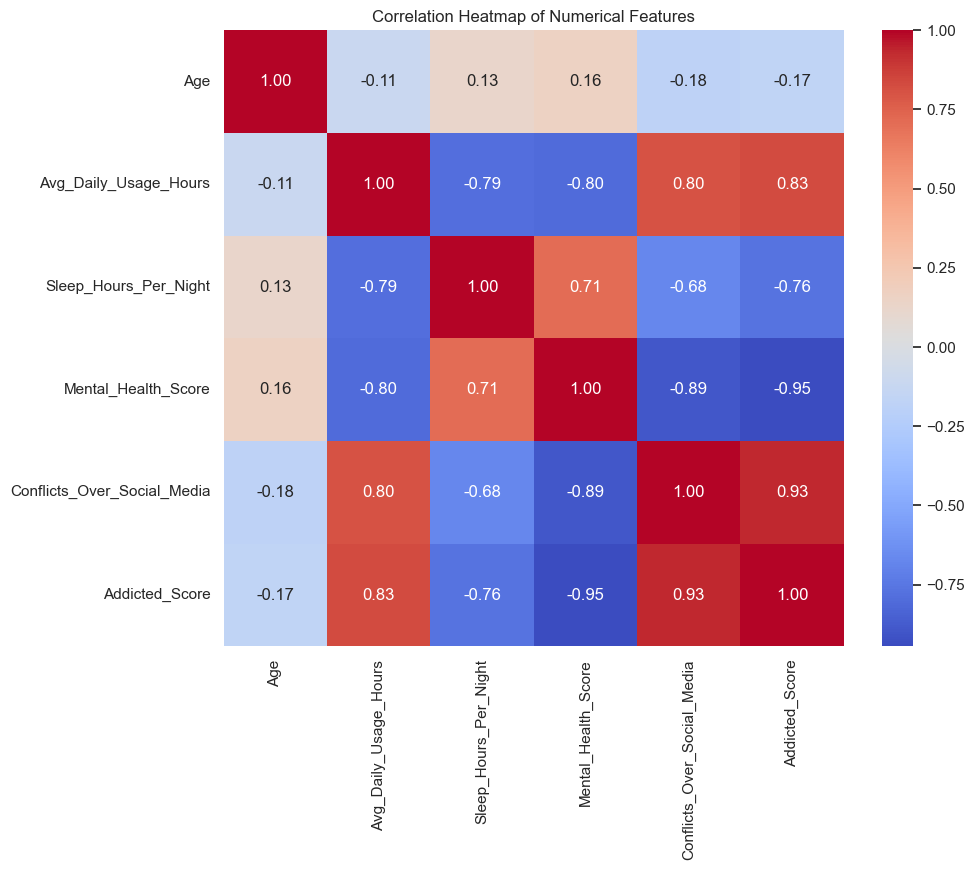

In [5]:
plt.figure(figsize=(10, 8))
numeric_df = df.select_dtypes(include=['float64', 'int64']).drop(columns=['Student_ID'])
correlation_matrix = numeric_df.corr()
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Heatmap of Numerical Features')
plt.savefig('correlation_heatmap.png')
plt.show()

### ────────────────────────────────────────────────
### 2. Pie Chart - Most Used Platform
### ────────────────────────────────────────────────

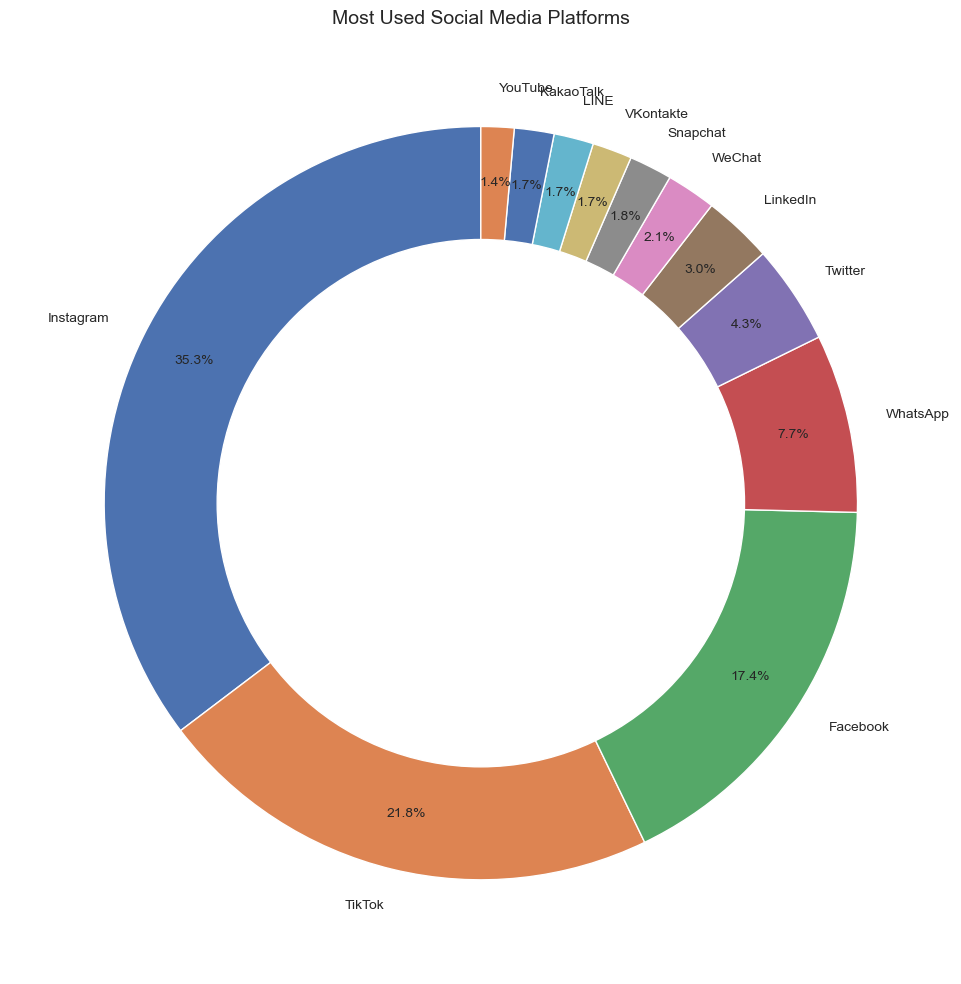

In [6]:
platform_counts = df['Most_Used_Platform'].value_counts()

plt.figure(figsize=(10, 10))
plt.pie(platform_counts, labels=platform_counts.index, autopct='%1.1f%%',
        startangle=90, pctdistance=0.85, textprops={'fontsize':10})
plt.title('Most Used Social Media Platforms', fontsize=14)
centre_circle = plt.Circle((0,0),0.70,fc='white')
fig = plt.gcf()
fig.gca().add_artist(centre_circle)
plt.tight_layout()
plt.savefig('most_used_platforms.png')
plt.show()

### ────────────────────────────────────────────────
### 3. Top 10 Countries by Average Addicted Score
### ────────────────────────────────────────────────

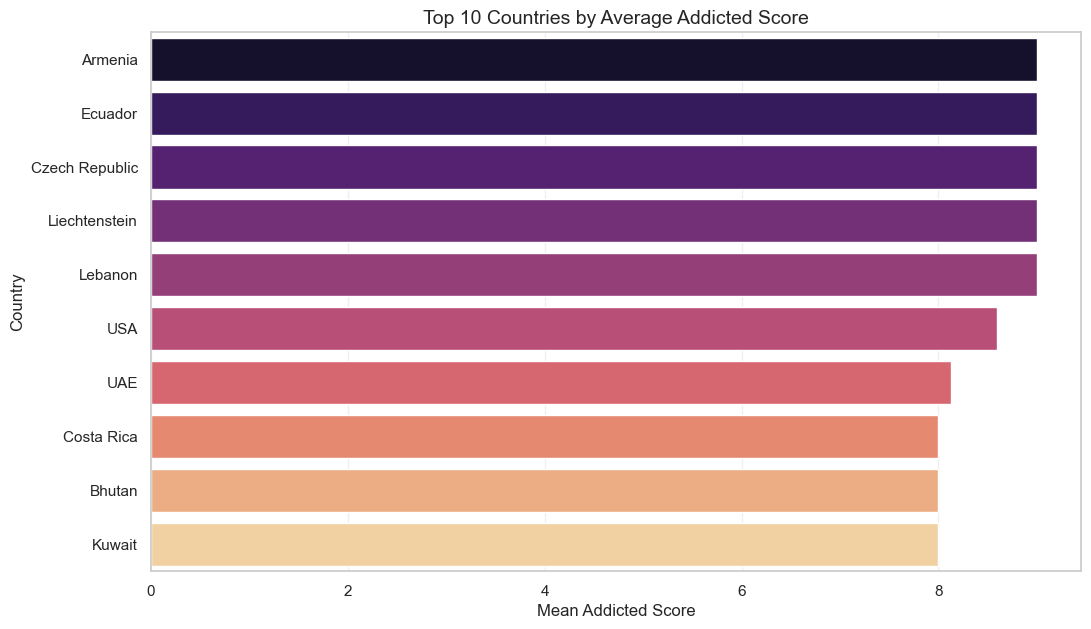

In [7]:
country_mean = df.groupby('Country')['Addicted_Score'].mean().sort_values(ascending=False).head(10)

plt.figure(figsize=(12, 7))
sns.barplot(x=country_mean.values, y=country_mean.index, palette='magma')
plt.title('Top 10 Countries by Average Addicted Score', fontsize=14)
plt.xlabel('Mean Addicted Score')
plt.ylabel('Country')
plt.grid(axis='x', alpha=0.3)
plt.savefig('top_countries_addiction.png')
plt.show()

### ────────────────────────────────────────────────
### 4. Addicted Score vs Avg Daily Usage Hours (binned)
### ────────────────────────────────────────────────

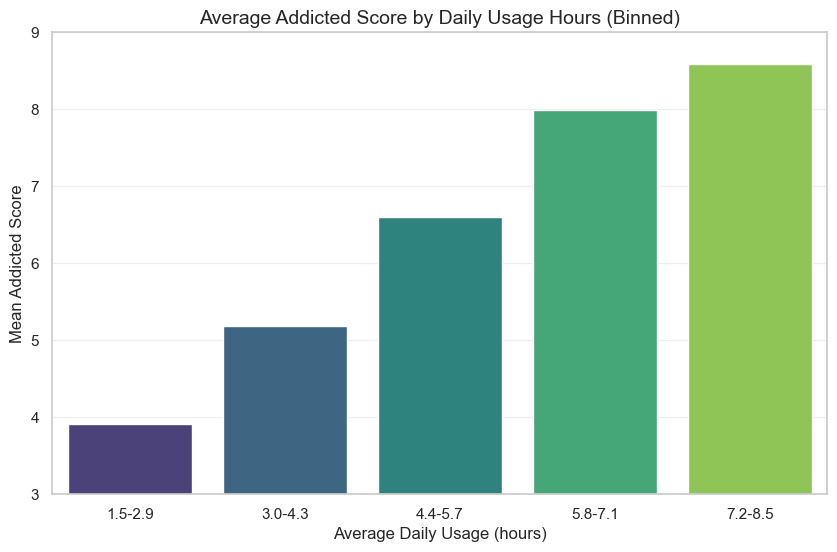

In [8]:
bins = [1.4, 2.9, 4.3, 5.7, 7.1, 8.6]
labels = ['1.5-2.9', '3.0-4.3', '4.4-5.7', '5.8-7.1', '7.2-8.5']
df['Usage_Bin'] = pd.cut(df['Avg_Daily_Usage_Hours'], bins=bins, labels=labels, include_lowest=True)

usage_mean = df.groupby('Usage_Bin', observed=True)['Addicted_Score'].mean().reset_index()

plt.figure(figsize=(10, 6))
sns.barplot(x='Usage_Bin', y='Addicted_Score', data=usage_mean, palette='viridis')
plt.title('Average Addicted Score by Daily Usage Hours (Binned)', fontsize=14)
plt.xlabel('Average Daily Usage (hours)')
plt.ylabel('Mean Addicted Score')
plt.ylim(3, 9)
plt.grid(axis='y', alpha=0.3)
plt.savefig('addiction_daily_usage.png')
plt.show()

### ────────────────────────────────────────────────
### 5. Addicted Score Across Relationship Status (Violin Plot)
### ────────────────────────────────────────────────

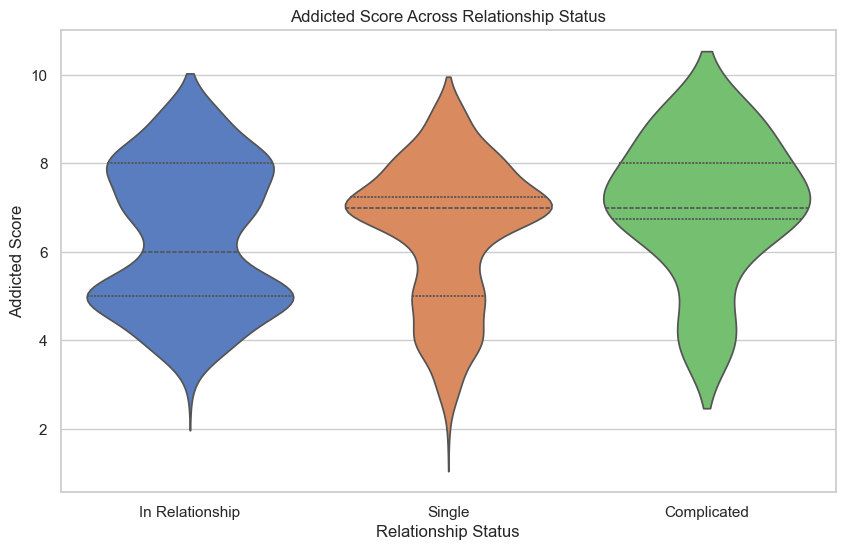

In [9]:
plt.figure(figsize=(10, 6))
sns.violinplot(data=df, x='Relationship_Status', y='Addicted_Score', inner="quart", palette="muted")
plt.title('Addicted Score Across Relationship Status')
plt.xlabel('Relationship Status')
plt.ylabel('Addicted Score')
plt.savefig('addiction_relationship.png')
plt.show()

### ────────────────────────────────────────────────
### 6. Daily Usage vs Addiction Score (Scatter Plot)
### ────────────────────────────────────────────────

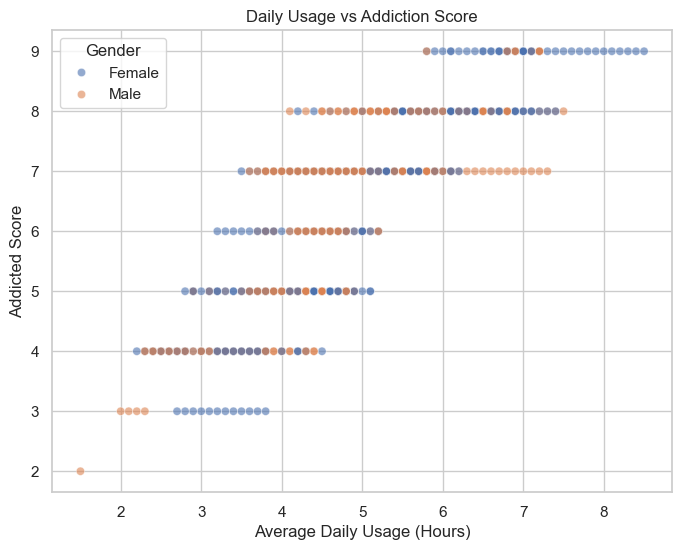

In [10]:
plt.figure(figsize=(8, 6))
sns.scatterplot(data=df, x='Avg_Daily_Usage_Hours', y='Addicted_Score', hue='Gender', alpha=0.6)
plt.title('Daily Usage vs Addiction Score')
plt.xlabel('Average Daily Usage (Hours)')
plt.ylabel('Addicted Score')
plt.savefig('usage_vs_addiction.png')
plt.show()

### ────────────────────────────────────────────────
### 7. Boxplot - Addicted Score by Academic Level
### ────────────────────────────────────────────────

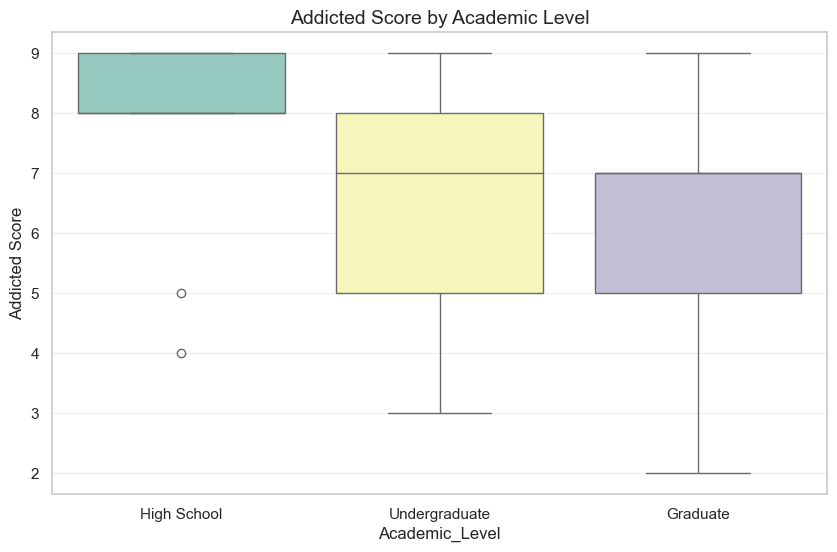

In [11]:
plt.figure(figsize=(10, 6))
order = ['High School', 'Undergraduate', 'Graduate']
sns.boxplot(x='Academic_Level', y='Addicted_Score', data=df, order=order, palette='Set3')
plt.title('Addicted Score by Academic Level', fontsize=14)
plt.ylabel('Addicted Score')
plt.grid(axis='y', alpha=0.3)
plt.savefig('addiction_academic_level.png')
plt.show()

### ────────────────────────────────────────────────
### 8. Sleep Hours vs Mental Health Score (Regression Plot)
### ────────────────────────────────────────────────

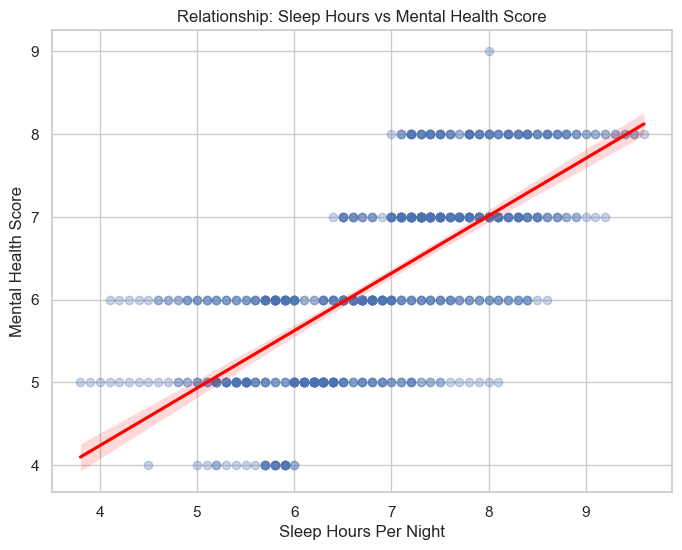

All plots generated successfully.


In [12]:

plt.figure(figsize=(8, 6))
sns.regplot(data=df, x='Sleep_Hours_Per_Night', y='Mental_Health_Score', 
            scatter_kws={'alpha':0.3}, line_kws={'color':'red'})
plt.title('Relationship: Sleep Hours vs Mental Health Score')
plt.xlabel('Sleep Hours Per Night')
plt.ylabel('Mental Health Score')
plt.savefig('sleep_vs_mental_health.png')
plt.show()


print("All plots generated successfully.")


## Prepare, Preprocessing, Split training & testing sets

In [13]:
# Prepare features and target variable
X = df.drop("Addicted_Score", axis=1)
y = df["Addicted_Score"]

In [14]:
# Preprocessing: One-Hot Encoding for categorical variables
categorical_cols = X.select_dtypes(include=["object"]).columns
numerical_cols = X.select_dtypes(include=["int64", "float64"]).columns
preprocessor = ColumnTransformer(
    transformers=[
        ("num", "passthrough", numerical_cols),
        ("cat", OneHotEncoder(handle_unknown="ignore", sparse_output=False), categorical_cols),
    ]
)


In [15]:
# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)


## Define models to evaluate & Results

In [16]:
models = {

    # Linear Models
    "LinearRegression": LinearRegression(),
    "Ridge": Ridge(),
    "Lasso": Lasso(),
    "ElasticNet": ElasticNet(),
    "BayesianRidge": BayesianRidge(),

    # Tree-Based
    "DecisionTree": DecisionTreeRegressor(random_state=42),
    "RandomForest": RandomForestRegressor(random_state=42),
    "ExtraTrees": ExtraTreesRegressor(random_state=42),
    "GradientBoosting": GradientBoostingRegressor(random_state=42),

    # Distance / Kernel
    "SVR": SVR(),
    "KNN": KNeighborsRegressor(),

    # Neural Network
    "MLPRegressor": MLPRegressor(max_iter=1000, random_state=42)
}

In [17]:
# Evaluate each model
results = []

for name, model in models.items():
    pipe = Pipeline(steps=[
        ("preprocessor", preprocessor),
        ("model", model)
    ])
    
    pipe.fit(X_train, y_train)
    y_pred = pipe.predict(X_test)
    
    r2 = r2_score(y_test, y_pred)
    rmse = np.sqrt(mean_squared_error(y_test, y_pred))
    
    results.append({
        "Model": name,
        "R2 Score": r2,
        "RMSE": rmse
    })

results_df = pd.DataFrame(results).sort_values(by="R2 Score", ascending=False)
print(results_df)

               Model  R2 Score      RMSE
7         ExtraTrees  0.992749  0.134700
6       RandomForest  0.989359  0.163180
8   GradientBoosting  0.988037  0.173021
5       DecisionTree  0.985829  0.188311
1              Ridge  0.977113  0.239311
4      BayesianRidge  0.977068  0.239546
11      MLPRegressor  0.963903  0.300542
0   LinearRegression  0.962025  0.308260
3         ElasticNet  0.765052  0.766752
2              Lasso  0.565376  1.042859
10               KNN  0.325327  1.299318
9                SVR -0.091338  1.652526


## =============================================================================
## Graphical Representations of Model Comparison Results
## =============================================================================

### ────────────────────────────────────────────────
### 1. Model performance comparison using R2 Score
### ────────────────────────────────────────────────

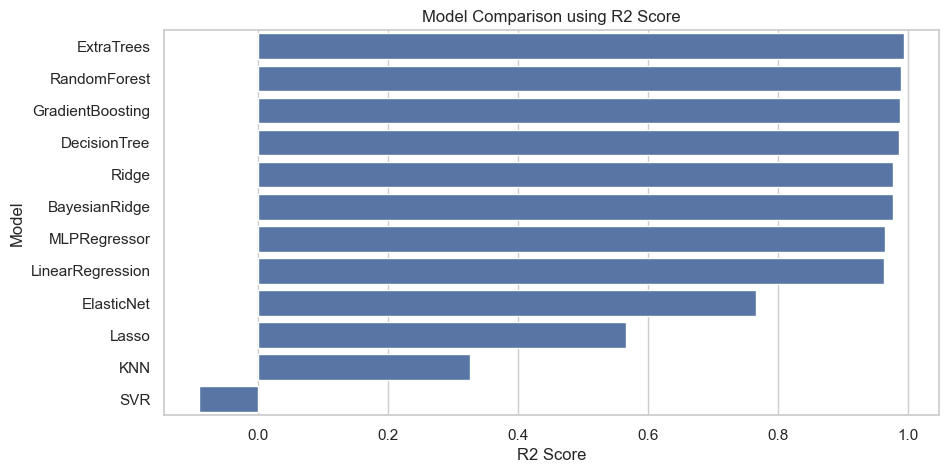

In [18]:
plt.figure(figsize=(10,5))
sns.barplot(x="R2 Score", y="Model", data=results_df)
plt.title("Model Comparison using R2 Score")
plt.xlabel("R2 Score")
plt.ylabel("Model")
plt.savefig('model_comparison_r2.png')
plt.show()

### ────────────────────────────────────────────────
### 2. Model performance comparison using RMSE
### ────────────────────────────────────────────────

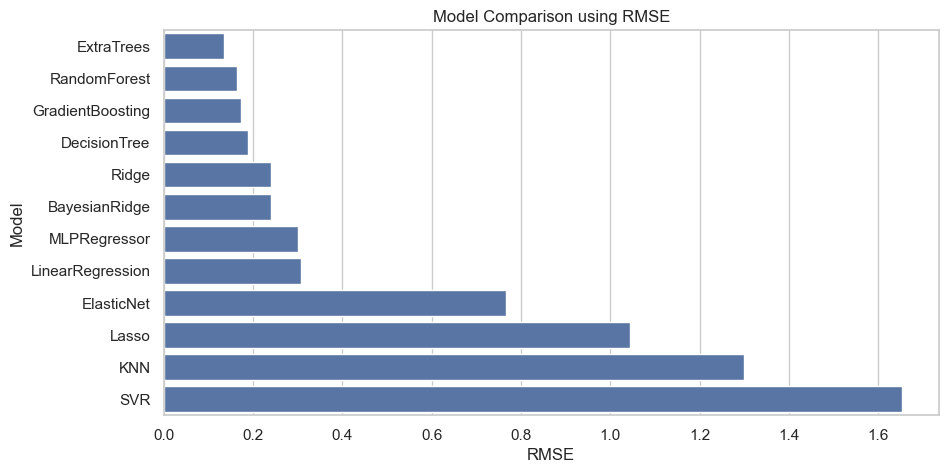

In [19]:
plt.figure(figsize=(10,5))
sns.barplot(x="RMSE", y="Model", data=results_df)
plt.title("Model Comparison using RMSE")
plt.xlabel("RMSE")
plt.ylabel("Model")
plt.savefig('model_comparison_rmse.png')
plt.show()

### ────────────────────────────────────────────────
### 3. Best Model performance comparison 
### ────────────────────────────────────────────────

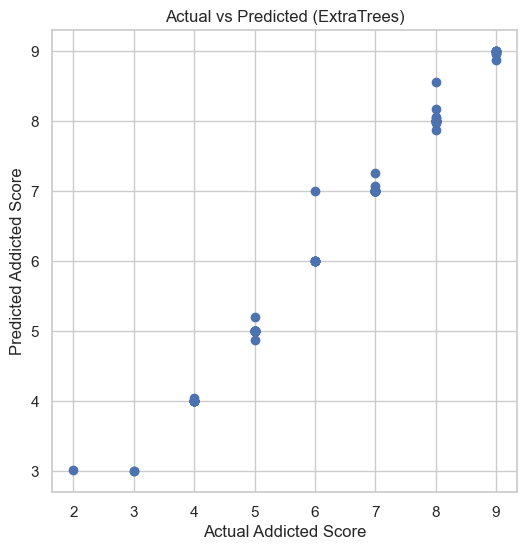

In [20]:
best_model_name = results_df.iloc[0]["Model"]
best_pipe = Pipeline([
    ("preprocessor", preprocessor),
    ("model", models[best_model_name])
])
best_pipe.fit(X_train, y_train)
y_pred_best = best_pipe.predict(X_test)

plt.figure(figsize=(6,6))
plt.scatter(y_test, y_pred_best)
plt.xlabel("Actual Addicted Score")
plt.ylabel("Predicted Addicted Score")
plt.title(f"Actual vs Predicted ({best_model_name})")
plt.savefig('actual_vs_predicted.png')
plt.show()